# ELITEPROSPECET DRAFT SCRAPPING

Hello, it will be an another webscrapping and also to exercice the cleaning of data.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def fetch_draft_data(year):
    # Fetch the webpage
    url = f'https://www.eliteprospects.com/draft/nhl-entry-draft/{year}'
    response = requests.get(url)
    html_content = response.text

    # Parse the HTML content
    soup = BeautifulSoup(html_content, 'html.parser')

    # Find the div with the ID 'drafted-players'
    div = soup.find('div', id='drafted-players')

    # If div is found, proceed to extract player data
    data = []
    if div:
        rows = div.find_all('tr')
        for row in rows:
            columns = row.find_all('td')
            # Extract text from each column
            row_data = [col.get_text(strip=True) for col in columns]
            # Prepend the year to each row's data
            row_data.insert(0, year)
            data.append(row_data)  # Append each row's data to the list
    else:
        print(f"Div with ID 'drafted-players' not found for year {year}.")
    
    return data


In [4]:
# Define the years of interest
years = range(2007, 2023)

# Define custom headers
custom_headers = [
    "Year", "Pick", "", "Team", "Player", "Seasons", "GP", "Goals", "Assists", "Points", "PM"
]

# Initialize a list to hold all data
all_data = []

for year in years:
    print(f"Fetching data for year {year}...")
    year_data = fetch_draft_data(year)
    if year_data:
        all_data.extend(year_data)

Fetching data for year 2007...
Fetching data for year 2008...
Fetching data for year 2009...
Fetching data for year 2010...
Fetching data for year 2011...
Fetching data for year 2012...
Fetching data for year 2013...
Fetching data for year 2014...
Fetching data for year 2015...
Fetching data for year 2016...
Fetching data for year 2017...
Fetching data for year 2018...
Fetching data for year 2019...
Fetching data for year 2020...
Fetching data for year 2021...
Fetching data for year 2022...


In [22]:

# Create a DataFrame from the collected data
df = pd.DataFrame(all_data, columns=custom_headers)
print(df.head())

   Year     Pick                       Team                  Player Seasons  \
0  2007     None  None                 None                    None    None   
1  2007  ROUND 1  None                 None                    None    None   
2  2007       #1         Chicago Blackhawks        Patrick Kane (F)      18   
3  2007       #2        Philadelphia Flyers  James van Riemsdyk (F)      16   
4  2007       #3            Phoenix Coyotes         Kyle Turris (F)      14   

     GP Goals Assists Points    PM  
0  None  None    None   None  None  
1  None  None    None   None  None  
2  1230   471     813   1284   442  
3  1011   311     318    629   394  
4   776   168     256    424   343  


Here, we will drop the 'None' Values

In [23]:

# Drop rows where 'Pick', 'Team', or 'Player' is None or ""
df = df.dropna(subset=['Pick', 'Team', 'Player'])

# Alternatively, if you want to remove rows containing empty strings as well:
df = df[df['Pick'].notna() & df['Team'].notna() & df['Player'].notna()]
df = df[(df['Pick'] != "") & (df['Team'] != "") & (df['Player'] != "")]

# Reset the index for cleanliness
df = df.reset_index(drop=True)

print(df)

      Year  Pick                    Team                  Player Seasons  \
0     2007    #1      Chicago Blackhawks        Patrick Kane (F)      18   
1     2007    #2     Philadelphia Flyers  James van Riemsdyk (F)      16   
2     2007    #3         Phoenix Coyotes         Kyle Turris (F)      14   
3     2007    #4       Los Angeles Kings       Thomas Hickey (D)       9   
4     2007    #5     Washington Capitals         Karl Alzner (D)      12   
...    ...   ... ..                  ...                     ...     ...   
3420  2022  #221        Florida Panthers         Jack Devine (F)           
3421  2022  #222         Edmonton Oilers         Joel Määttä (F)           
3422  2022  #223     Tampa Bay Lightning         Dyllan Gill (D)           
3423  2022  #224     Tampa Bay Lightning     Klavs Veinbergs (F)           
3424  2022  #225      Colorado Avalanche       Ivan Zhigalov (G)           

        GP Goals Assists Points   PM  
0     1230   471     813   1284  442  
1     101

Now, we check to see if there is any not numeric value in Points and GP and then groups then into each draft position.

In [24]:
# Convert 'Points' and 'GP' columns to numeric, coercing errors to NaN
df['Points'] = pd.to_numeric(df['Points'], errors='coerce')
df['GP'] = pd.to_numeric(df['GP'], errors='coerce')

# Replace NaN values in 'Points' and 'GP' with 0
df['Points'] = df['Points'].fillna(0)
df['GP'] = df['GP'].fillna(0)

# Group by 'Pick' and calculate the sum of 'Points' and 'GP'
points_gp_per_pick = df.groupby('Pick')[['Points', 'GP']].sum().reset_index()

# Sort the picks by 'Points' in descending order and select the top 10
top_10_picks = points_gp_per_pick.nlargest(10, 'Points')
print(top_10_picks[['Pick', 'Points', 'GP']])  # Display both Points and GP for verification

# Sort the picks by 'Points' in ascending order and select the worst 10
worst_10_picks = points_gp_per_pick.nsmallest(10, 'Points')
print(worst_10_picks[['Pick', 'Points', 'GP']])


    Pick  Points      GP
0     #1  9075.0  9934.0
111   #2  6387.0  9178.0
148   #3  5395.0  8744.0
192   #7  4958.0  8150.0
214   #9  4617.0  7700.0
159   #4  4565.0  7793.0
181   #6  4065.0  7338.0
170   #5  3814.0  7666.0
144  #26  3207.0  5691.0
23   #12  2960.0  6779.0
     Pick  Points     GP
41   #136     0.0   43.0
60   #153     0.0  127.0
108  #197     0.0    0.0
110  #199     0.0  121.0
125  #211     0.0    0.0
127  #213     0.0    0.0
128  #214     0.0   18.0
129  #215     0.0    0.0
130  #216     0.0    0.0
131  #217     0.0    0.0


Let's try to represent it in a table.

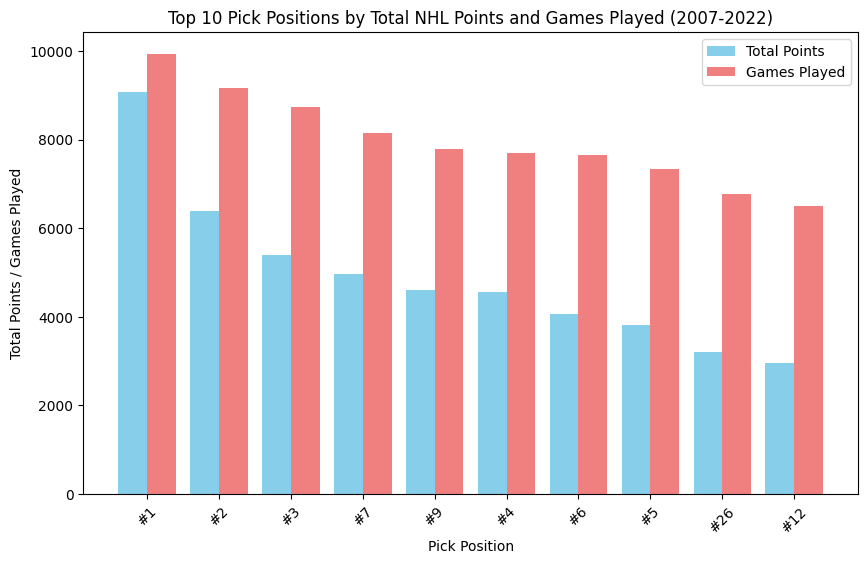

In [26]:
import numpy as np

# Plot the top 10 picks using Matplotlib
plt.figure(figsize=(10, 6))

# Define width of the bars
bar_width = 0.4

# Create an array of positions for the bars
positions = np.arange(len(top_10_picks['Pick']))

# Plot the 'Points' bars
plt.bar(positions, top_10_picks['Points'], width=bar_width, color='skyblue', label='Total Points')

# Plot the 'GP' bars, offset by the width of the previous bars
plt.bar(positions + bar_width, top_10_picksGP['GP'], width=bar_width, color='lightcoral', label='Games Played')

# Set labels and title
plt.xlabel('Pick Position')
plt.ylabel('Total Points / Games Played')
plt.title('Top 10 Pick Positions by Total NHL Points and Games Played (2007-2022)')

# Adjust the x-ticks to show the correct labels for Pick Position
plt.xticks(positions + bar_width / 2, top_10_picks['Pick'], rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.show()


     Pick  Points     GP
41   #136     0.0   43.0
60   #153     0.0  127.0
108  #197     0.0    0.0
110  #199     0.0  121.0
125  #211     0.0    0.0
127  #213     0.0    0.0
128  #214     0.0   18.0
129  #215     0.0    0.0
130  #216     0.0    0.0
131  #217     0.0    0.0


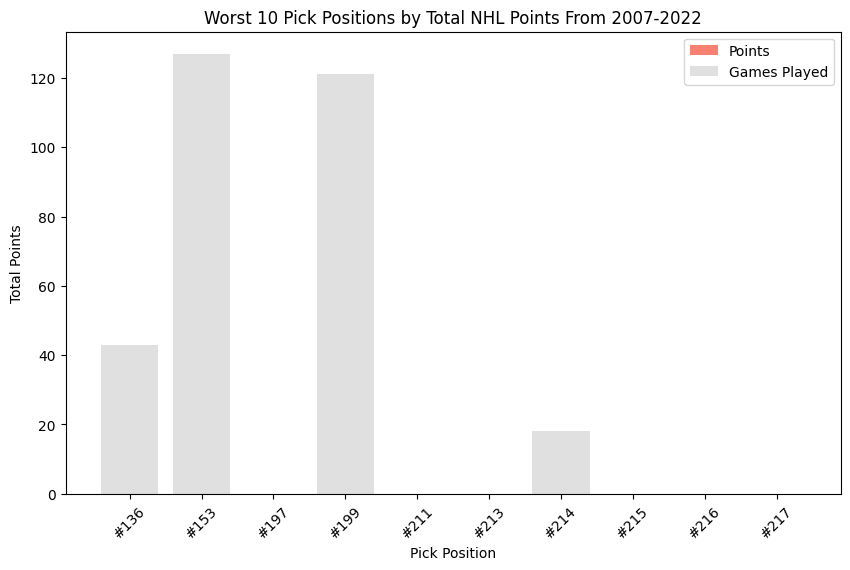

In [27]:
# Sort the picks by 'Points' in ascending order and select the worst 10
worst_10_picks = points_gp_per_pick.nsmallest(10, 'Points')
print(worst_10_picks[['Pick', 'Points', 'GP']])  # Display both Points and GP for verification

# Optional: Plot the worst 10 picks using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(worst_10_picks['Pick'], worst_10_picks['Points'], color='salmon', label='Points')
plt.xlabel('Pick Position')
plt.ylabel('Total Points')
plt.title('Worst 10 Pick Positions by Total NHL Points From 2007-2022')
plt.xticks(rotation=45)

# Optionally, add GP as a secondary bar
plt.bar(worst_10_picks['Pick'], worst_10_picks['GP'], color='lightgrey', alpha=0.7, label='Games Played')

plt.legend()
plt.show()

We can see natuarally the the first picks are the best points producers and played the most games. We can see in the top that the order are kind of respected with #4 a bit lower. This analysis does not differentiate defenseman as well in this draft group, altough Cale Makar would prove my wrong here. Kudos to #26, there were Evgeny Kutznetzov or David Perron in this group.

In the lower end, some drafts picks have never scored a points and some did not played any games. Later pick from #211 was added during this period with new team addition such as Las Vegas or Seattles.